# Ideal ORE

## Posterior Bayes Vulnerability

In [1]:
import collections
import math
import numpy as np
import pandas as pd
from scipy.special import perm # for nPk
from sympy.utilities.iterables import partitions
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

__uni_ore_bayes__ calculates the posterior Bayes vulnerability for ideal Order Revealing Encryption (ORE). Only works on a uniform prior for now. 

Number of channel outputs over number of channel inputs

$$ V_1 [C \triangleright \pi ]  = \frac{ \sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times i!}{k ^ n}  $$


c_sum:= channel outputs (ways to order integer partitions), a sum of the stirling number of the second kind (n, i) times i!

TODO: ^^^ FUBINI NUMBERS. USE A PYTHON LIBRARY OR A NICER FORMULA ^^^

num_channel_rows := n ^ k

In [27]:
def uni_ore_bayes(n, k):
    c_sum = 0
    num_channel_rows = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        c_sum = c_sum + (math.factorial(c+1) * s2)
    bayes = c_sum / math.pow(k, n)
    return bayes

__df_uni_ore_bayes__ calculates the prior and posterior Bayes vulnerabilities for a range of n values, from 1-n_range and outputs to a dataframe.

In [3]:
def df_uni_ore_bayes(n_range, k):
    n = 0
    n_list = []
    prior_list = []
    post_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        post = uni_ore_bayes(n, k)
        post_list.append(post)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'posterior':post_list
        }
    )
    return df

## Tests

Matches Kuifje code

| N   | K   | Inners (total) | Inners (shape) | Kuifje     | Calc |
| --- | --- | ---            | ---          | ---          | ---  |
| 4   |  3  | 51             | 2            | 17/27        | 0.6296| 
| 4   | 10  | 75             | 4            | 3/400        | 0.0075 |
| 4   | 20  | 75             | 4            | 3/6400       | 0.00047 |
| 5   | 10  | 541            | 5            | 541/100000   | 0.0054 |
| 5   | 20  | 541            | 5            | 541/3200000  | 0.000169 |

In [4]:
n = 4
k = 3
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.629629629629630


In [5]:
n = 4
k = 10
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.00750000000000000


In [6]:
n = 4
k = 20
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.000468750000000000


In [7]:
n = 5
k = 10
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.00541000000000000


In [8]:
n = 5
k = 20
bayes = uni_ore_bayes(n, k)
print("Bayes: ", bayes)

Bayes:  0.000169062500000000


## Graphs

In [9]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [10]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

In [60]:
def zoom_graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 2, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-0.00001, top = .0002)
    
    plt.title('Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

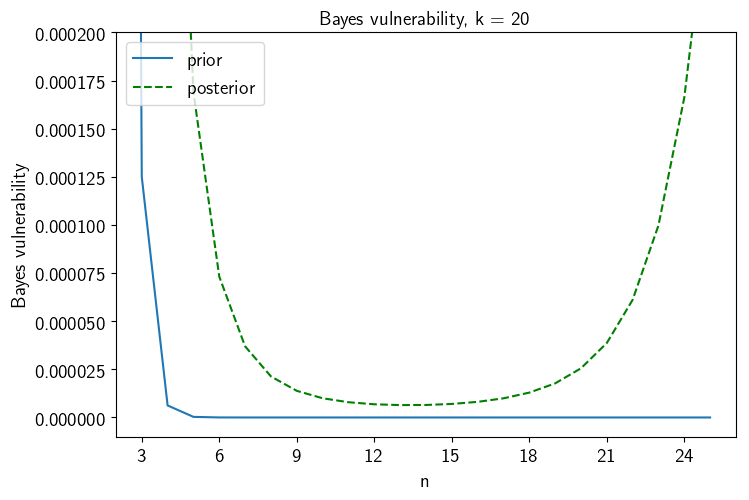

In [61]:
n_range = 25
k = 20
df = df_uni_ore_bayes(n_range, k)
zoom_graph_it_bayes(n_range, k, df)

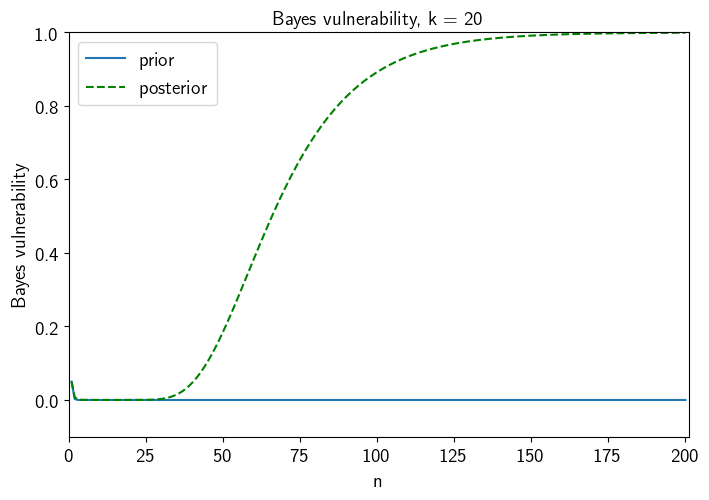

In [11]:
n_range = 200
k = 20
df = df_uni_ore_bayes(n_range, k)
graph_it_bayes(n_range, k, df)

In [12]:
df

,n,prior,posterior
0,1,5.0000000000e-02,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000
2,3,1.2500000000e-04,0.00162500000000000
3,4,6.2500000000e-06,0.000468750000000000
4,5,3.1250000000e-07,0.000169062500000000
5,6,1.5625000000e-08,7.31718750000000e-5
6,7,7.8125000000e-10,3.69476562500000e-5
7,8,3.9062500000e-11,2.13216796875000e-5
8,9,1.9531250000e-12,1.38423066406250e-5
9,10,9.7656250000e-14,9.98511357421875e-6


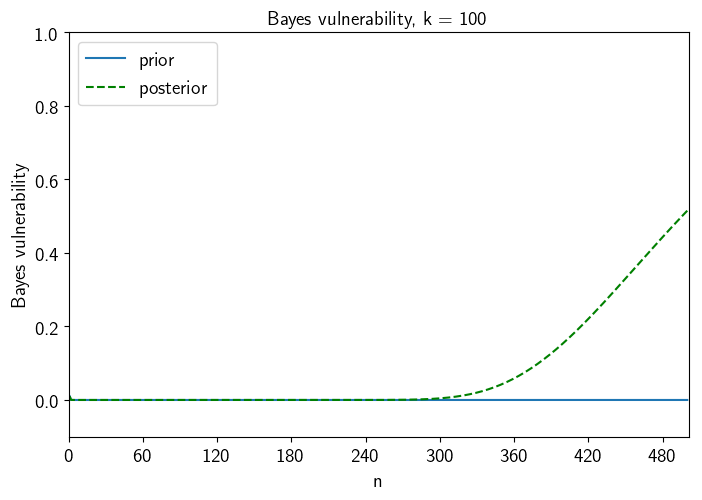

In [13]:
n_range = 500
k = 100
df = df_uni_ore_bayes(n_range, k)
graph_it_bayes(n_range, k, df)

## In depth perspective of the shape

__uni_shape_dist__ provides more insight into the shape of a hyper distribution and calculates the inner and outer probabilities for every 'inner' in the abstracted shape.

In [14]:
def uni_shape_dist(n, k):
    shape_cnt = []
    edb_rows_list = []
    inner_list = []
    c_sum = 0
    num_channel_rows = 0
    for c in range(n):
        if k < c+1:
            break
        shape_cnt.append(c+1)
        s2 = stirling(n, c+1)     
        edb_rows = perm(k, c+1) * s2 # how many rows in channel coorespond to this shape?
        edb_rows_list.append(edb_rows)
        num_channel_rows = num_channel_rows + edb_rows
        inner = math.factorial(c+1) / perm(k, c+1)
        inner_list.append(inner)
    df = pd.DataFrame(
        {'shape_cnt':shape_cnt,
         'rows_in_channel':edb_rows_list,
         'inner':inner_list
        }
    )
    df['outer'] = df['rows_in_channel'] / num_channel_rows
    return df

In [16]:
n = 4 
k = 20
shape_df = uni_shape_dist(n,k)

In [17]:
shape_df

,shape_cnt,rows_in_channel,inner,outer
0,1,20.0000000000000,0.0500000000,0.000125000000000000
1,2,2660,0.0052631579,0.0166250000000000
2,3,41040.0000000000,0.0008771930,0.256500000000000
3,4,116280.000000000,0.0002063983,0.726750000000000


In [18]:
def graph_shape(n, k, df):
    ax = plt.figure().gca()
    plt.plot('shape_cnt', 'inner', 
             data=df,
             label="inner")
    plt.plot('shape_cnt', 'outer',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="outer")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Shape Number for now')
    plt.ylabel('Inner and outer probabilities')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

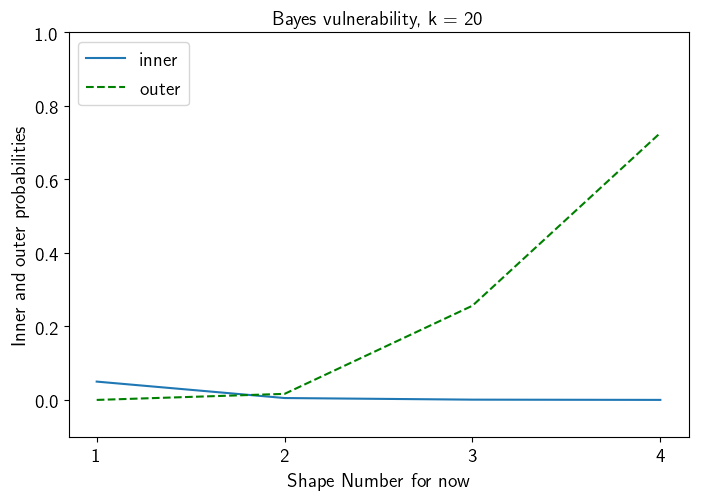

In [19]:
n = 4
k = 20
shape_df = uni_shape_dist(n, k)
graph_shape(n, k, shape_df)

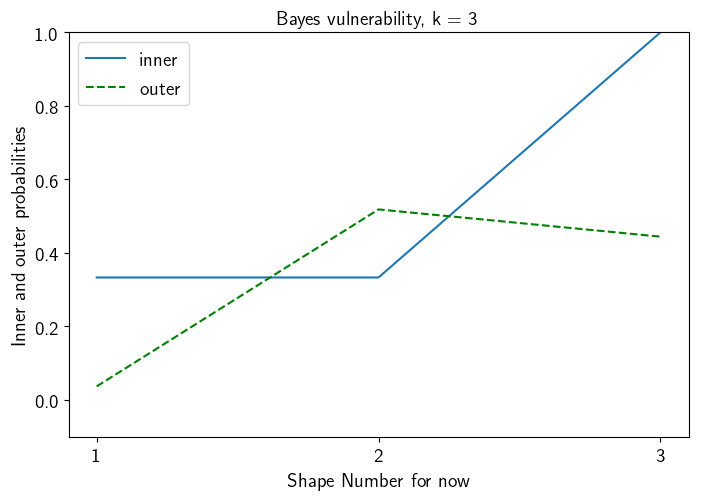

In [20]:
n = 4
k = 3
shape_df = uni_shape_dist(n, k)
graph_shape(n, k, shape_df)

In the case where there are 500 people in the db and only 100 unique values, there is case that occures with ~1/2 probability, and in that case, the adversary will be able to guess the correct column with almost aboslute certainty. 

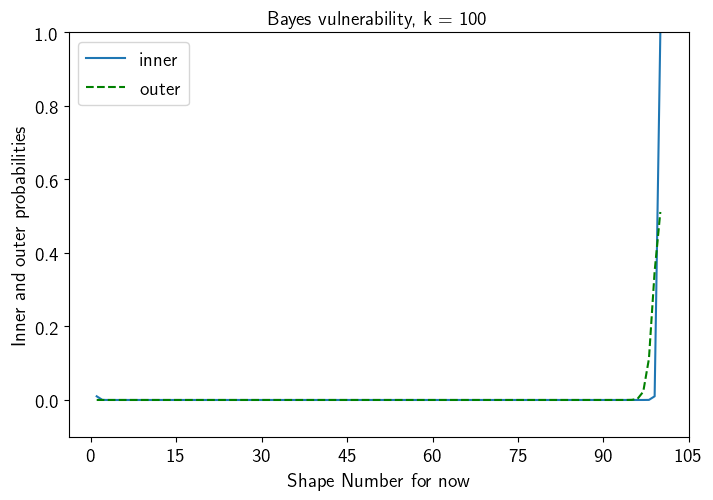

In [21]:
n = 500
k = 100
shape_df = uni_shape_dist(n, k)
graph_shape(n, k, shape_df)

In [22]:
shape_df

,shape_cnt,rows_in_channel,inner,outer
0,1,100.000000000000,1.0000000000e-02,1.00000000000000e-998
1,2,1.620328351e+154,2.0202020202e-04,1.62032835090859e-846
2,3,5.87945918339217e+243,6.1842918986e-06,5.87945918339217e-757
3,4,4.20162633821397e+307,2.5502234633e-07,4.20162633821397e-693
4,5,2.29998582565704e+357,1.3282413872e-08,2.29998582565704e-643
5,6,1.41879790419971e+398,8.3888929715e-10,1.41879790419970e-602
6,7,5.66689501759317e+432,6.2470479575e-11,5.66689501759317e-568
7,8,6.52697001541466e+462,5.3738046946e-12,6.52697001541466e-538
8,9,2.51488516577384e+489,5.2569828534e-13,2.51488516577384e-511
9,10,1.73103094564400e+513,5.7769042345e-14,1.73103094564400e-487


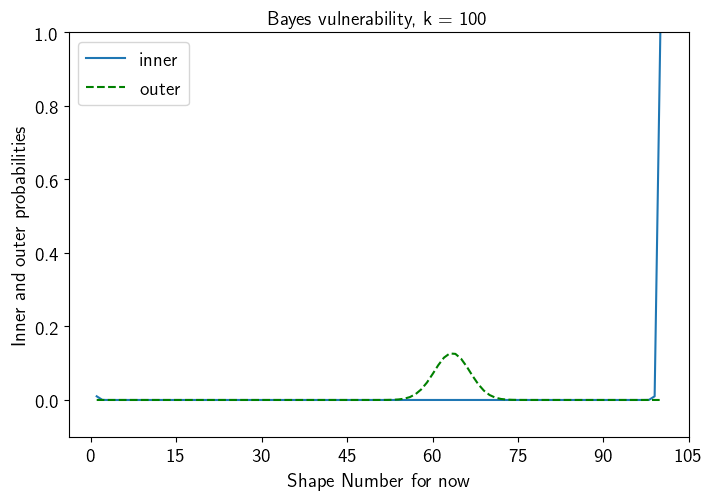

In [28]:
n = 100
k = 100
shape_df = uni_shape_dist(n, k)
graph_shape(n, k, shape_df)